Python for Data & Analytics - 2nd Edition<br>
Chapter 19, section 5

Stock and Option Simulation

#### A) Normal distribution

In [1]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the seed allows for reproducibility of pseudorandom numbers
npr.seed(10)

In [3]:
# generate a random number from the standard normal distribution
npr.standard_normal()

1.331586504129518

In [4]:
# generate 10,000 random numbers from the standard normal distribution
n = 10000
nrv = npr.standard_normal(n)

In [5]:
# display the first 4 random values
nrv[:4]

array([ 0.71527897, -1.54540029, -0.00838385,  0.62133597])

In [6]:
print('Mean=', np.mean(nrv))
print('Standard Deviation=', np.std(nrv))

Mean= 0.0047502021532197245
Standard Deviation= 0.9898178056420499


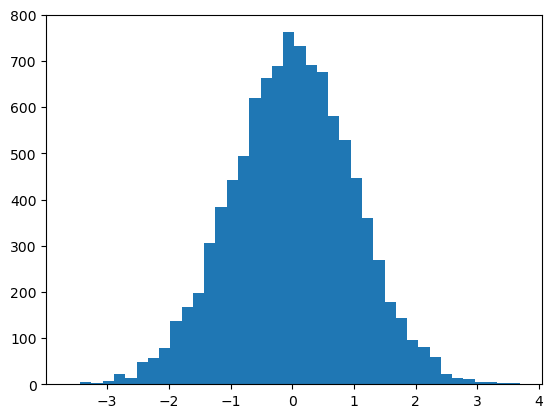

In [7]:
# visualize the histogram of the generated random values
plt.hist(nrv, bins=40)
plt.show()

#### B) Stock price with one path

In [8]:
# set parameters
days = 250          # number of business days until option expires
dt = 1/days         # fraction of a year
dtsqrt = dt**.5     # sqrt of dt
riskFreeRate = 0.02 # assumed risk-free rate, in decimal
volatility = .40    # assumed volatility of stock, in decimal
stockPrice = 200    # example starting stock price

In [9]:
# initialize an ndarray
stockPrices = np.zeros(days+1)
stockPrices[0] = stockPrice

In [10]:
# generate a random path of daily stock prices
for day in range(1, days+1):
   stockPrices[day] = stockPrices[day-1] + \
    stockPrices[day-1] * (riskFreeRate * dt +
                          volatility * dtsqrt * npr.standard_normal())

In [11]:
# display the first few daily stock prices
stockPrices[:4]

array([200.        , 196.09041359, 195.64710472, 193.62492754])

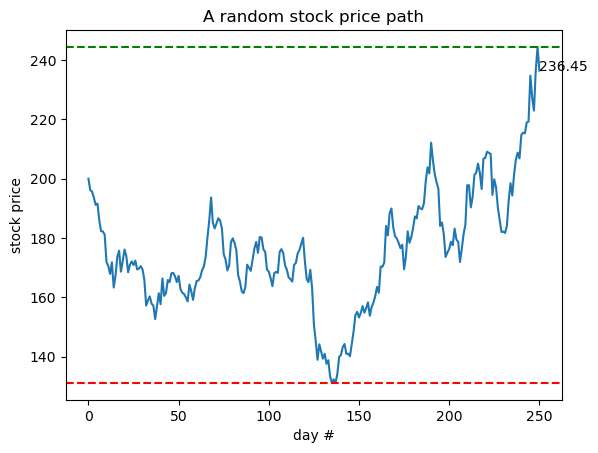

In [12]:
# visualize the random path of the stock price
plt.plot(stockPrices)
plt.text(days,stockPrices[-1], str(round(stockPrices[-1],2)))
plt.axhline(y=max(stockPrices), linestyle='dashed', color='green')
plt.axhline(y=min(stockPrices), linestyle='dashed', color='red')
plt.title('A random stock price path')
plt.xlabel('day #')
plt.ylabel('stock price')
plt.show()

#### C) Option valuation with multiple paths

In [13]:
# set an example strike price for the option
strikePrice = 210

In [14]:
# initialize for option valuation simulation
npaths = 50000 # number of paths
stockPriceMatrix = np.zeros((days+1, npaths))
stockPriceMatrix[0] = stockPrice

In [15]:
# generate the stock price paths
for day in range(1, days+1):
   stockPriceMatrix[day] = stockPriceMatrix[day-1] + \
                            stockPriceMatrix[day-1] * \
                             (riskFreeRate * dt + \
                              volatility * dtsqrt * npr.standard_normal(npaths))

In [16]:
# display part of the stock price paths
stockPriceMatrix

array([[200.        , 200.        , 200.        , ..., 200.        ,
        200.        , 200.        ],
       [192.85688033, 200.46017022, 207.11876864, ..., 197.51225553,
        212.935362  , 204.87193055],
       [193.18508343, 200.01974699, 206.27698833, ..., 190.56625096,
        218.08588508, 207.31190898],
       ...,
       [ 95.8894198 , 143.69320436, 402.51165417, ..., 414.32806625,
        157.07598872, 140.40347344],
       [ 94.26396741, 142.92603672, 404.43790354, ..., 391.44352873,
        152.47553261, 142.64665764],
       [ 92.8320861 , 140.82506539, 409.88795012, ..., 382.35583525,
        160.55208734, 142.67844472]])

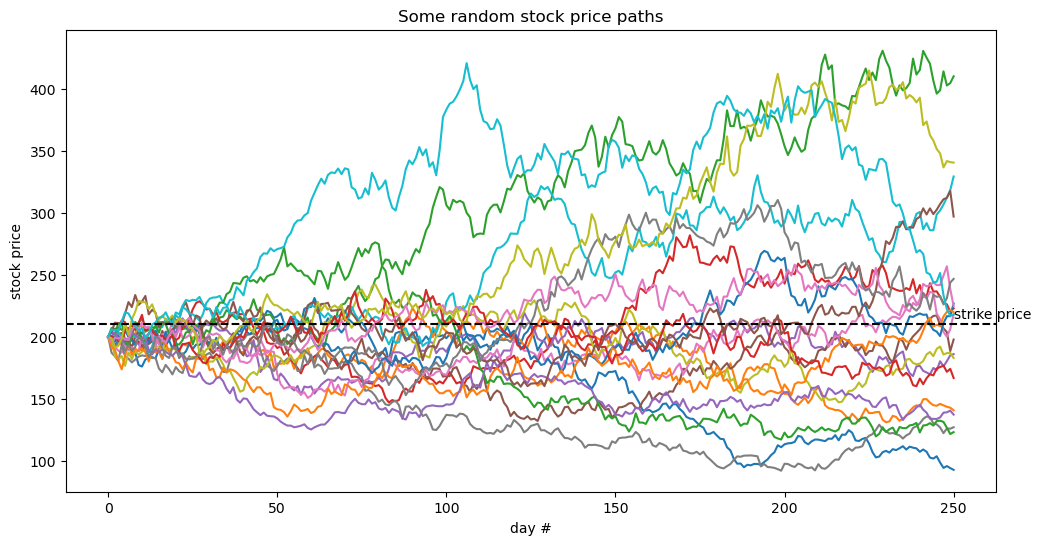

In [17]:
# visualize some of the stock price paths
npathsForChart = 20
plt.figure(figsize=(12,6))
plt.plot(stockPriceMatrix[:,:npathsForChart])
plt.text(days,strikePrice+5, 'strike price')
plt.axhline(y=strikePrice, linestyle='dashed', color='black')
plt.title('Some random stock price paths')
plt.xlabel('day #')
plt.ylabel('stock price')
plt.show()

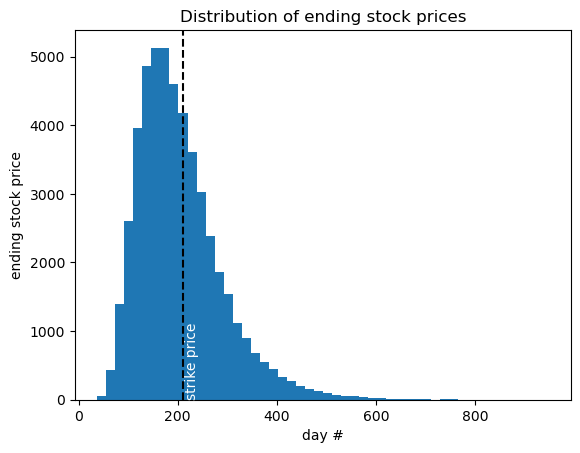

In [18]:
# visualize the distribution of ending stock prices
plt.hist(stockPriceMatrix[-1], bins=50)
plt.axvline(x=strikePrice, linestyle='dashed', color='black')
plt.text(strikePrice+5,40,'strike price', rotation=90, color='white')
plt.title('Distribution of ending stock prices')
plt.xlabel('day #')
plt.ylabel('ending stock price')
plt.show()

In [19]:
# what was the average ending stock price
avgStockPrice = sum(stockPriceMatrix[-1]) / npaths
print(f'Average stock price at expiry= {avgStockPrice:.2f}')

Average stock price at expiry= 204.63


In [20]:
# to value the 1-year option, first average all option payoffs at expiry
totalPayoffs = 0
for stockPriceEnd in stockPriceMatrix[-1]:
    if stockPriceEnd >= strikePrice: # exrecise option if in the money
        payoff = stockPriceEnd - strikePrice
        totalPayoffs += payoff
avgPayoff = totalPayoffs/npaths # average of option payoffs across all paths
print(f'Average payoff at expiry= {avgPayoff:.2f}')

Average payoff at expiry= 30.22


In [21]:
# then value the option by discounting the average payoffs
#  from the future to the present
optionPrice = avgPayoff / (1+riskFreeRate/250)**250
print(f'Calculated call option price= {optionPrice:.2f}')

Calculated call option price= 29.62


Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC